Generalización del Modelo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Se desea hacer una regresión polinomial para los siguientes datos. Analice el efecto del grado del polinomio sobre la regresión.


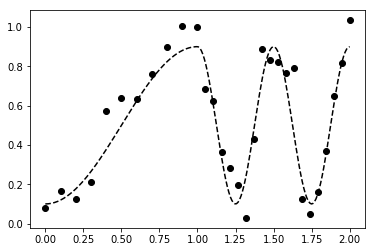

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

##
## Por facilidad se generará una muestra artificial
## de 11 puntos
##
def f(x):
    result = [0.5 - 0.4 * np.cos(3.1416 * e) if e <= 1 
              else 0.5 + 0.4 * np.cos(4 * 3.1416 * e) for e in x]
    return np.array(result)

x_data = np.concatenate((np.linspace(start=0.0, stop=0.9, num=10),
                         np.linspace(start=1.0, stop=2.0, num=20)))
d_data = f(x_data)
np.random.seed(12345)
d_data = d_data + np.random.normal(0, 0.1, len(d_data))

## Los puntos representan los datos observados por
## el modelador
plt.plot(x_data, d_data, 'o', color='black');

## La línea punteada representa el proceso real que
## se desea aproximar (sin ruido)
x_real = np.linspace(start=0, stop=2, num=200)
d_real = f(x_real)
plt.plot(x_real, d_real, '--', color='black');

# Solución al problema propuesto

En las siguientes figuras se presenta el ajuste de polinomios de diferente grado a la muestra de datos.

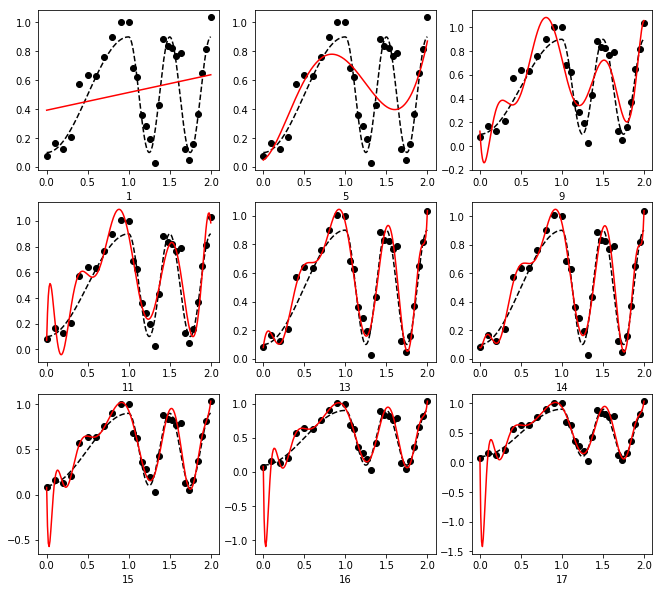

In [4]:
## se hace el gráfico para los siguientes
## grados del polinomio
grados = [1, 5, 9, 11, 13, 14, 15, 16, 17]

plt.figure(figsize=(11,10))
i = 1

sse_data = []
sse_val = []

for n in range(1,max(grados)+ 1):
    ## ajusta el modelo
    w = np.polyfit(x_data, d_data, n)
    m = np.poly1d(w)
    
    y_data = m(x_data)
    y_real = m(x_real)
    
    sse_data.append(sum((d_data - y_data)**2))
    sse_val.append(sum((d_real  - y_real)**2))
    
    
    ## graficos
    if n in grados and i <= 9:
        plt.subplot(3, 3, i)
        i += 1
        plt.plot(x_data, d_data, 'o', color='black');
        plt.plot(x_real, d_real, '--', color='black');
        plt.plot(x_real, y_real, color='red')
        plt.xlabel(n);
    

A continuación se presenta la evolución de los errores de ajuste y validación para diferentes grados del polinomio.

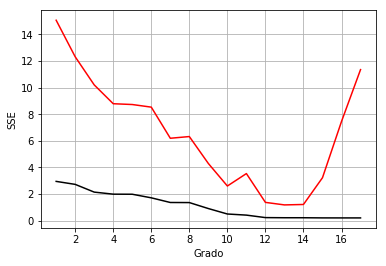

In [6]:
plt.plot(range(1, 1+max(grados)), sse_data, color='black')
plt.plot(range(1, 1+max(grados)), sse_val,  color='red')
plt.ylabel('SSE')
plt.xlabel('Grado');
plt.grid();

En este caso, se puede suponer que el grado del polinomio es similar a la cantidad de neuronas en la capa oculta de una red neuronal. Un mayor grado del polinomio equivale a un mayor número de neuoronas en la capa oculta.

De acuedo con la gráfica anterior, se reconocen tres casos:


* Subajuste: El modelo no reproduce adecuadamente ni el comportamiento de los datos de entrenamiento ni del comportamiento subyacente (polinomios de orden bajo. Equivale a un error alto de ajuste y un error alto de validación.


* Sobreajuste: El modelo empieza a memorizar los datos de entrenamiento (muy bajo error de ajuste, pero error muy alto de validación); el modelo oscila locamente entre los puntos conocidos (polinomios de grado 13 en adelante).


* Ajuste óptimo: El modelo tiene un bajo error de ajuste y un bajo error de validación (polinomios de grados 12, 13 y 14). En este caso se preferiría el polinomio de grado 12 por tener menos parámetros.

**Conclusión.--** En la práctica solo se dispone de una muestra finita de datos, por lo que la información se suele dividir en un conjunto de entrenamiento (fitting) para estimar los parametros del modelo y en un conjunto de prueba (testing) para medir la generalización. 

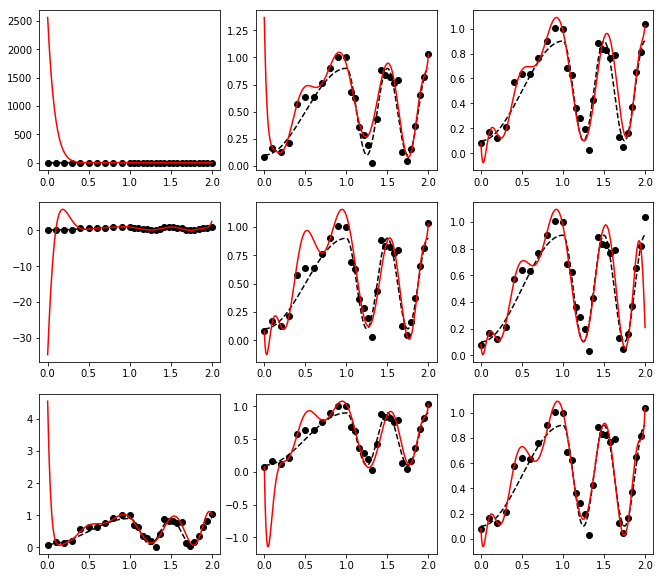

In [21]:
##
## Los datos disponibles se dividen en dos conjuntos:
## x_fit, y_fit: para estimar el modelo
## x_test, y_test: para evaluar la generalización
##
## Se usaran 20 datos para estimar el modelo
## y los 10 restantes para evaluarlo. 
## Los conjuntos son escogidos aleatoriamente
##

## orden del modelo
n = 12

plt.figure(figsize=(11,10))
i = 1
sse_fit = []
sse_test = []

for k in range(9):
    
    index = np.random.choice(30, 20, replace=False)
    
    x_fit = x_data[index]
    d_fit = d_data[index]
    
    x_test = np.delete(x_data, index)
    d_test = np.delete(d_data, index)

    w = np.polyfit(x_fit, d_fit, n)
    m = np.poly1d(w)
    
    y_fit  = m(x_fit)
    y_test = m(x_test)
    y_real = m(x_real)
    
    sse_fit.append(sum((d_fit - y_fit)**2))
    sse_test.append(sum((d_test  - y_test)**2))

    plt.subplot(3, 3, i)
    i += 1
    plt.plot(x_data, d_data, 'o', color='black');
    plt.plot(x_real, d_real, '--', color='black');
    plt.plot(x_real, y_real, color='red')


Todos los gráficos anteriores fueron generados para un polinomio de grado 12. Todos los grafos tienen un valor diferente para los errores de entramiento y prueba. Los valores de la SSE para las muestras de entranamiento y prueba son graficadas en la siguiente celda. Note que la calidad de la generalización depende del subconjunto de puntos usados para ajustar el modelo. Es decir, los resultados obtenidos dependen de (son altamente sensibles a) la muestra aletoria seleccionada. 

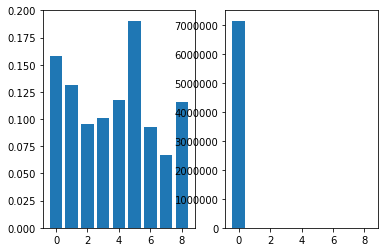

In [22]:
plt.subplot(1, 2, 1)
plt.bar(range(len(sse_fit)), sse_fit)
plt.subplot(1, 2, 2)
plt.bar(range(len(sse_test)), sse_test);

**Conclusión.--** El error es una cantidad aleatoria que tiene una distribución de probabilidades. Ver capítulo 12 *model performance*  del curso *Statistics-for-Analytics*.

El siguiente código implementa el método de *KFold Crossvalidation* para determinar el grado óptimo del polinomio.

(0, 1)

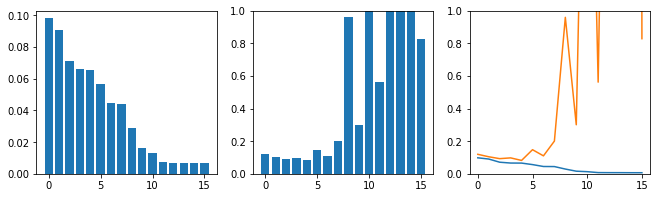

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=25, shuffle=True)

sse_fit_n = []
sse_test_n = []

for n in range(1, 17):
    
    sse_fit = []
    sse_test = []
    
    for fit_index, test_index in kf.split(x_data, y_data):
        
        x_fit = x_data[fit_index]
        d_fit = d_data[fit_index]

        x_test = x_data[test_index]
        d_test = d_data[test_index]

        w = np.polyfit(x_fit, d_fit, n)
        m = np.poly1d(w)

        y_fit  = m(x_fit)
        y_test = m(x_test)

        sse_fit.append(sum((d_fit - y_fit)**2) / len(d_fit))
        sse_test.append(sum((d_test  - y_test)**2) / len(d_test))

    sse_fit = sum(sse_fit) / len(sse_fit)
    sse_test = sum(sse_test) / len(sse_test)
    
    sse_fit_n.append(sse_fit)
    sse_test_n.append(sse_test)
    
plt.figure(figsize=(11,3))
plt.subplot(1, 3, 1)
plt.bar(range(len(sse_fit_n)), sse_fit_n)
plt.subplot(1, 3, 2)
plt.bar(range(len(sse_test_n)), sse_test_n);
plt.ylim(0, 1)
plt.subplot(1, 3, 3)
plt.plot(sse_fit_n)
plt.plot(sse_test_n);
plt.ylim(0, 1)
        

Generalización del Modelo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 